In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data= pd.read_csv('C:/Users/HARSHA/Downloads/shipments.csv')
data.head(10).append(data.tail(10))

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ID                     10999 non-null int64
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Reached.on.Time_Y.N    10999 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<AxesSubplot:>

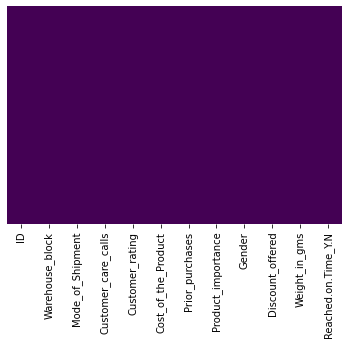

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<AxesSubplot:>

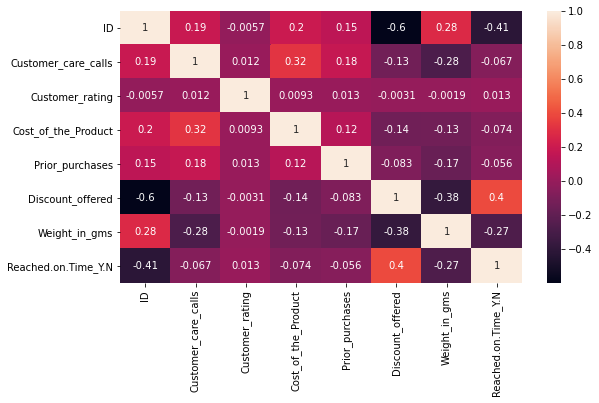

In [7]:
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(),annot=True)

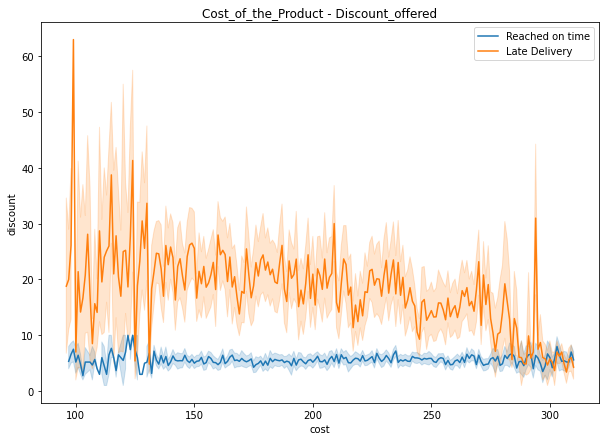

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x="Cost_of_the_Product",y="Discount_offered",hue="Reached.on.Time_Y.N",data=data)
ax.legend(["Reached on time","Late Delivery"])
plt.ylabel("discount")
plt.xlabel("cost")
plt.title("Cost_of_the_Product - Discount_offered")
plt.show()

Customers who received a discount of more than 10$ did not receive on time delivery.

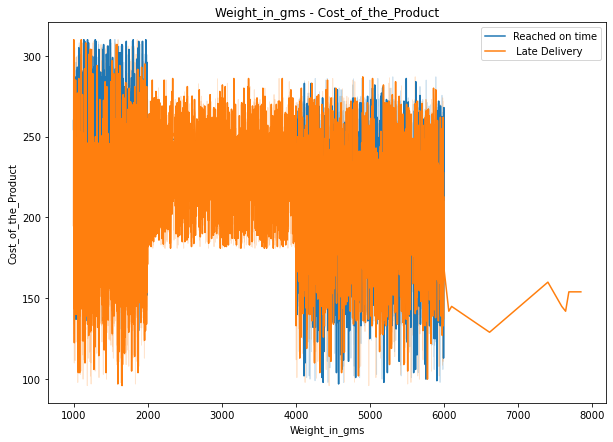

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N",data=data)
ax.legend(["Reached on time"," Late Delivery"])
plt.ylabel("Cost_of_the_Product")
plt.xlabel("Weight_in_gms")
plt.title("Weight_in_gms - Cost_of_the_Product")
plt.show()

2000-3000 and after 6000gms weighted products not reached on time

<AxesSubplot:>

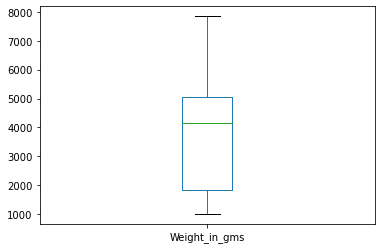

In [10]:
#outliers
data.boxplot(column =['Weight_in_gms'], grid = False)

<AxesSubplot:>

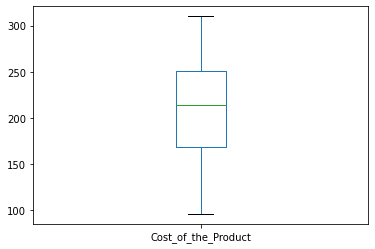

In [11]:
#outliers
data.boxplot(column =['Cost_of_the_Product'], grid = False)

<AxesSubplot:>

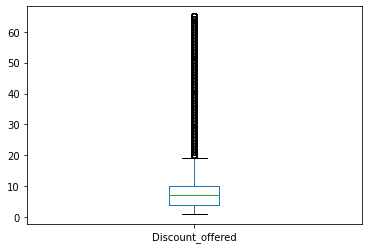

In [12]:
#outliers
data.boxplot(column =['Discount_offered'], grid = False)

we have more outliers for discount offered

In [13]:
Q1=data['Discount_offered'].quantile(0.25)
Q3=data['Discount_offered'].quantile(0.75)
IQR = Q3-Q1
IQR

6.0

In [14]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print(lower_lim)
print(upper_lim)

-5.0
19.0


Text(0.5, 1.0, 'Winsorized Data (Discount offered)')

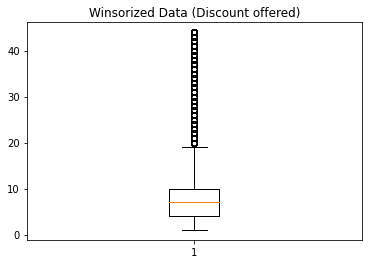

In [15]:
# Handling Outliers with winsorization
from scipy.stats.mstats import winsorize
data_win= winsorize(data["Discount_offered"],(0,0.10))
plt.boxplot(data_win)
plt.title("Winsorized Data (Discount offered)")

In [16]:
#label encoding
data["Mode_of_Shipment"].replace({"Flight":0,"Road":1,"Ship":2},inplace=True)
data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
data["Gender"].replace({"M":1,"F":0},inplace=True)

#one hot encoding
df = data
df["Discount_offered"] = data_win
data = pd.get_dummies(df, columns=["Warehouse_block"],drop_first = True)

In [17]:
# Drop ID column
data = data.drop('ID', axis=1)

In [18]:
Train = data[:6000]
Test = data[6000:]

In [19]:
trainLabel = np.asarray(Train['Reached.on.Time_Y.N'])
trainData = np.asarray(Train.drop('Reached.on.Time_Y.N',1))
testLabel = np.asarray(Test['Reached.on.Time_Y.N'])
testData = np.asarray(Test.drop('Reached.on.Time_Y.N',1))

In [20]:
#normalize our inputs

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [21]:
Shipment_arrival = LogisticRegression()
Shipment_arrival.fit(trainData, trainLabel)

LogisticRegression()

In [22]:
accuracy = Shipment_arrival.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  49.78995799159832 %


Text(0.5, 0, 'Importance')

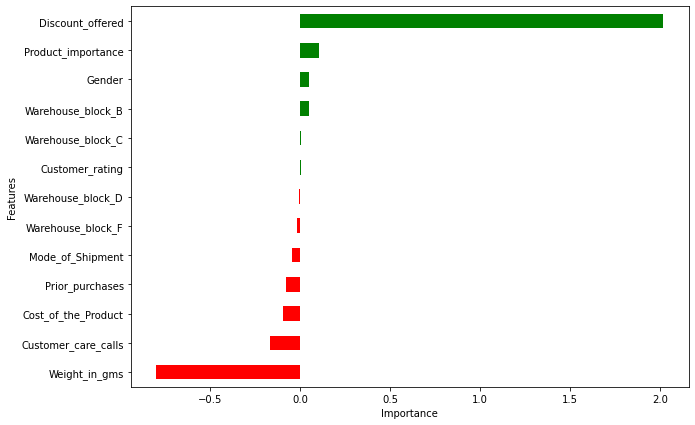

In [23]:
coeff = list(Shipment_arrival.coef_[0])
labels = list(Train.drop('Reached.on.Time_Y.N',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 7),color = features.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')

In [24]:
SampleData=data[613:614]
SampleDataFeatures = np.asarray(SampleData.drop('Reached.on.Time_Y.N',1))
SampleDataFeatures = (SampleDataFeatures - means)/stds

PredictionProbability = Shipment_arrival.predict_proba(SampleDataFeatures)
Prediction = Shipment_arrival.predict(SampleDataFeatures)
print('Insurance Claim Probability:', PredictionProbability)
print('Insurance Claim Prediction:', Prediction)

Insurance Claim Probability: [[0.06503881 0.93496119]]
Insurance Claim Prediction: [1]


In [25]:
SampleData

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
613,2,4,5,247,2,1,0,18,2404,1,0,0,0,1


In [ ]:
# Generate and dataset for Logistic Regression
x, y = make_classification(n_samples=10999,n_features=18,n_classes=2,n_clusters_per_class=1,flip_y=0.03,n_informative=1,n_redundant=0,n_repeated=0)